In [53]:
import matplotlib.pyplot as plt
import pandas as pd
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

# Import data

In [39]:
url = 'https://raw.githubusercontent.com/arofiqimaulana/dataset/master/iris.csv'
df = pd.read_csv(url)

In [40]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [41]:
X = df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]

# Standarisasi

In [42]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

# Clustering
Meskipun k-mean tidak membutuhkan variabel Y, namun kita bisa melakukan validasi menggunakan data berlabel seperti data iris.

In [43]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [44]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

In [45]:
labels = pd.DataFrame(kmeans.labels_)
labels.columns = ['label_kmeans']

In [46]:
df['labels'] = labels

In [47]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name,labels
0,5.1,3.5,1.4,0.2,0,setosa,1
1,4.9,3.0,1.4,0.2,0,setosa,1
2,4.7,3.2,1.3,0.2,0,setosa,1
3,4.6,3.1,1.5,0.2,0,setosa,1
4,5.0,3.6,1.4,0.2,0,setosa,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica,0
146,6.3,2.5,5.0,1.9,2,virginica,2
147,6.5,3.0,5.2,2.0,2,virginica,0
148,6.2,3.4,5.4,2.3,2,virginica,0


# Visualize using PCA
Visualisasi data paling mudah menggunakan grafik 2 dimensi. Karena kita punya lebih dari 2 variabel, maka kita bisa gunakan PCA untuk menjadikannya menjadi 2 variabel baru.

In [51]:
pca = PCA(2)

arr_pca = pca.fit_transform(X)

In [54]:
df_pca = pd.DataFrame(arr_pca)
df_pca.columns = ['PC1','PC2']
df_pca['labels'] = labels

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

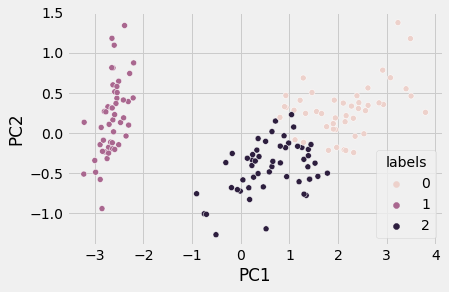

In [55]:
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="labels")

# Pemilihan k terbaik
Pemilihan k terbaik bisa menggunakan teknik silhouette. Teknik ini menggunakan SSE (Sum of Square) di setiap nilai k. SSE yang sudah tidak terlalu jauh, maka bisa katakan k itulah yang terbaik. 

Berdasarkan grafik di bawah ini, bisa kita katakan bahwa jumlah cluster paling optimal adalah 3. Hal ini karena nilai SSE yang sudah tidak terlalu jauh jika kita pake k=4,k=5,k=6 dst.

In [29]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42
}

In [30]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


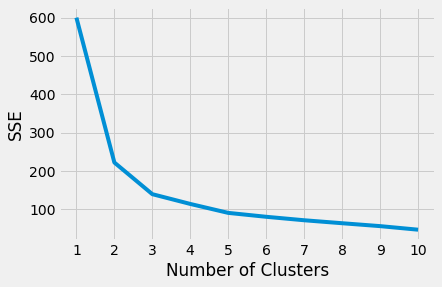

In [31]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

# Reference
- https://realpython.com/k-means-clustering-python/
- https://www.askpython.com/python/examples/plot-k-means-clusters-python
- https://seaborn.pydata.org/generated/seaborn.scatterplot.html